In [76]:
import random
import pandas as pd
import numpy as np
import os

from PIL import Image
import matplotlib
import cv2 as cv

from tqdm.auto import tqdm

import warnings
warnings.filterwarnings(action='ignore') 

In [77]:
import matplotlib.pyplot as plt
import seaborn as sns

In [78]:
import matplotlib.font_manager as fm
font_path ='D:/00-MY_CODE/OCR/나눔 글꼴/나눔고딕/NanumGothic.ttf'
fontprop = fm.FontProperties(fname=font_path, size=18)

# plt.ylabel('가격', fontproperties=fontprop)
# plt.title('가격 변동 추이')


In [79]:
from PIL import Image

import torch
import torch.nn as nn
import torch.optim as optim
import torch.nn.functional as F
from torch.utils.data import Dataset, DataLoader

from torchvision.models import resnet18
from torchvision import transforms

from tqdm.auto import tqdm
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

In [80]:
CFG = {
    'IMG_HEIGHT_SIZE':64,
    'IMG_WIDTH_SIZE':224,
    'EPOCHS':30,
    'LEARNING_RATE':1e-3,
    'BATCH_SIZE':256,
    'NUM_WORKERS':1, # 본인의 GPU, CPU 환경에 맞게 설정
    'SEED':41
}

In [81]:
def seed_everything(seed):
    random.seed(seed)
    os.environ['PYTHONHASHSEED'] = str(seed)
    np.random.seed(seed)
    torch.manual_seed(seed)
    torch.cuda.manual_seed(seed)
    torch.backends.cudnn.deterministic = True
    torch.backends.cudnn.benchmark = True

seed_everything(CFG['SEED']) # Seed 고정

In [82]:
df = pd.read_csv('./train.csv')
print(df.shape)

(76888, 3)


In [83]:
df.head()

,id,img_path,label
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색
1,TRAIN_00001,./train/TRAIN_00001.png,머
2,TRAIN_00002,./train/TRAIN_00002.png,차차
3,TRAIN_00003,./train/TRAIN_00003.png,써
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다


In [84]:
df

,id,img_path,label
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색
1,TRAIN_00001,./train/TRAIN_00001.png,머
2,TRAIN_00002,./train/TRAIN_00002.png,차차
3,TRAIN_00003,./train/TRAIN_00003.png,써
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다
...,...,...,...
76883,TRAIN_76883,./train/TRAIN_76883.png,회
76884,TRAIN_76884,./train/TRAIN_76884.png,겪다
76885,TRAIN_76885,./train/TRAIN_76885.png,벨트
76886,TRAIN_76886,./train/TRAIN_76886.png,톼


In [85]:
# Length Label
# Pandas str.len(): 각 문자열의 길이를 결정하는데 사용. 메서드 호출 전 매번 str. 접두사 붙여야 함.
df['len']=df['label'].str.len()

In [86]:
df

,id,img_path,label,len
0,TRAIN_00000,./train/TRAIN_00000.png,빨간색,3
1,TRAIN_00001,./train/TRAIN_00001.png,머,1
2,TRAIN_00002,./train/TRAIN_00002.png,차차,2
3,TRAIN_00003,./train/TRAIN_00003.png,써,1
4,TRAIN_00004,./train/TRAIN_00004.png,놓치다,3
...,...,...,...,...
76883,TRAIN_76883,./train/TRAIN_76883.png,회,1
76884,TRAIN_76884,./train/TRAIN_76884.png,겪다,2
76885,TRAIN_76885,./train/TRAIN_76885.png,벨트,2
76886,TRAIN_76886,./train/TRAIN_76886.png,톼,1


In [97]:
df_1 = df[df.len==1]

In [98]:
df_1

,id,img_path,label,len
1,TRAIN_00001,./train/TRAIN_00001.png,머,1
3,TRAIN_00003,./train/TRAIN_00003.png,써,1
7,TRAIN_00007,./train/TRAIN_00007.png,빈,1
10,TRAIN_00010,./train/TRAIN_00010.png,윷,1
27,TRAIN_00027,./train/TRAIN_00027.png,훵,1
...,...,...,...,...
76869,TRAIN_76869,./train/TRAIN_76869.png,틈,1
76872,TRAIN_76872,./train/TRAIN_76872.png,부,1
76878,TRAIN_76878,./train/TRAIN_76878.png,잔,1
76883,TRAIN_76883,./train/TRAIN_76883.png,회,1


In [99]:
df_2 = df[df.len==2]
df_3 = df[df.len==3]
df_4 = df[df.len==4]
df_5 = df[df.len==5]

In [110]:
df_len_1 = df_1.drop('len', axis='columns')

In [111]:
df_len_1

,id,img_path,label
1,TRAIN_00001,./train/TRAIN_00001.png,머
3,TRAIN_00003,./train/TRAIN_00003.png,써
7,TRAIN_00007,./train/TRAIN_00007.png,빈
10,TRAIN_00010,./train/TRAIN_00010.png,윷
27,TRAIN_00027,./train/TRAIN_00027.png,훵
...,...,...,...
76869,TRAIN_76869,./train/TRAIN_76869.png,틈
76872,TRAIN_76872,./train/TRAIN_76872.png,부
76878,TRAIN_76878,./train/TRAIN_76878.png,잔
76883,TRAIN_76883,./train/TRAIN_76883.png,회


In [112]:
df_len_2 = df_2.drop('len', axis='columns')
df_len_3 = df_3.drop('len', axis='columns')
df_len_4 = df_4.drop('len', axis='columns')
df_len_5 = df_5.drop('len', axis='columns')

In [113]:
df_len_2

,id,img_path,label
2,TRAIN_00002,./train/TRAIN_00002.png,차차
6,TRAIN_00006,./train/TRAIN_00006.png,유월
8,TRAIN_00008,./train/TRAIN_00008.png,손뼉
9,TRAIN_00009,./train/TRAIN_00009.png,숫자
12,TRAIN_00012,./train/TRAIN_00012.png,썰다
...,...,...,...
76871,TRAIN_76871,./train/TRAIN_76871.png,간판
76875,TRAIN_76875,./train/TRAIN_76875.png,허락
76884,TRAIN_76884,./train/TRAIN_76884.png,겪다
76885,TRAIN_76885,./train/TRAIN_76885.png,벨트


In [114]:
# csv 저장
df_len_1.to_csv('./df_len_1.csv', index=False)
df_len_2.to_csv('./df_len_2.csv', index=False)
df_len_3.to_csv('./df_len_3.csv', index=False)
df_len_4.to_csv('./df_len_4.csv', index=False)
df_len_5.to_csv('./df_len_5.csv', index=False)

# gg

In [20]:
# Show Sample
def show_image(Image, Picture_Name):
    plt.imshow(Image)
    plt.title(Picture_Name, fontproperties=fontprop)
    plt.show()

In [21]:
def sample_df_by_len(df, n_sample, n_len, use_frac=False):
    cond=(df['len']==n_len)
    df=df.loc[cond]
    
    if use_frac==True:
        df=df.sample(frac=n_sample)
    else:
        df=df.sample(n=n_sample)
    return df

In [22]:
def show_sample_image(df, n_sample, n_len):
    df = sample_df_by_len(df, n_sample, n_len)
    
    for img, label in zip(df['img_path'], df['label']):
        img = cv.imread(img)
        show_image(img, label)

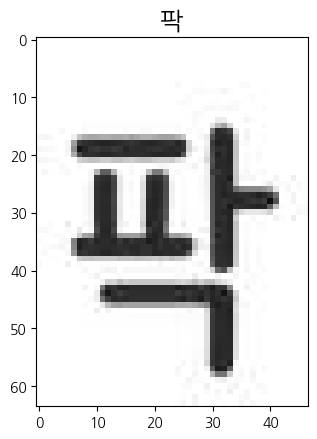

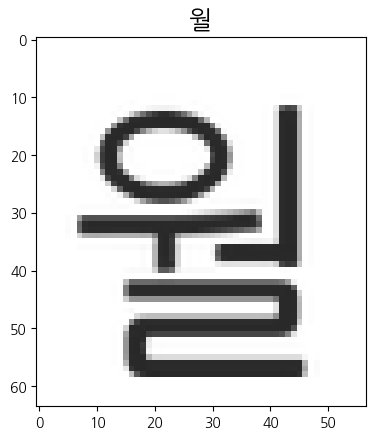

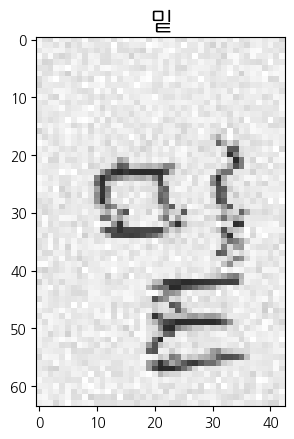

In [23]:
# 이미지 사이즈 일정하지 않고, 배경에 노이즈 존재, 흑백 이미지
show_sample_image(df=df, n_sample=3, n_len=1)

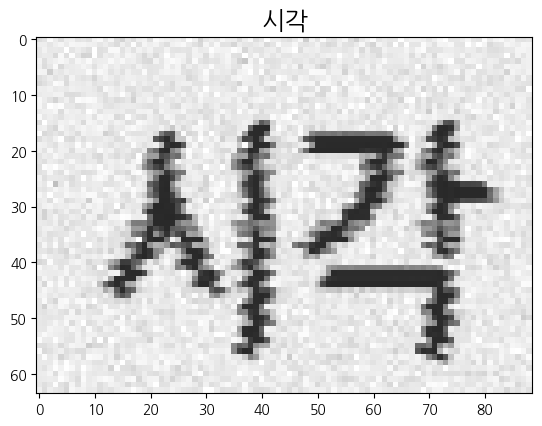

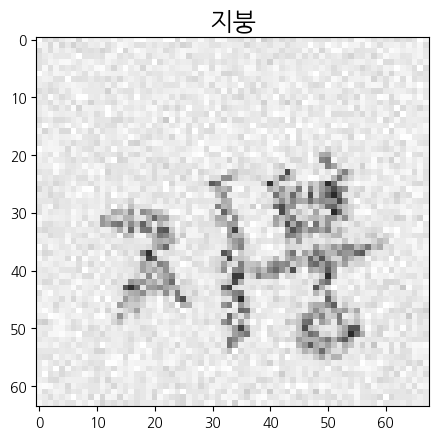

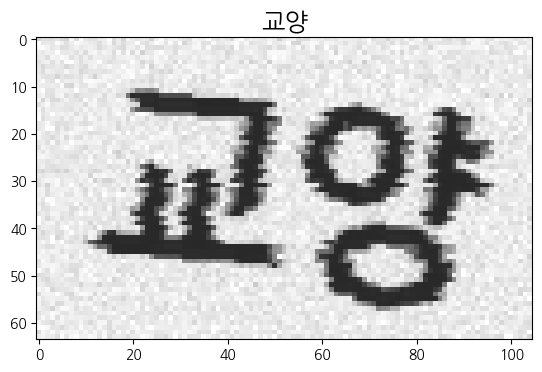

In [24]:
# 기울어진 글씨 존재
# 다양한 필체
show_sample_image(df=df, n_sample=3, n_len=2)

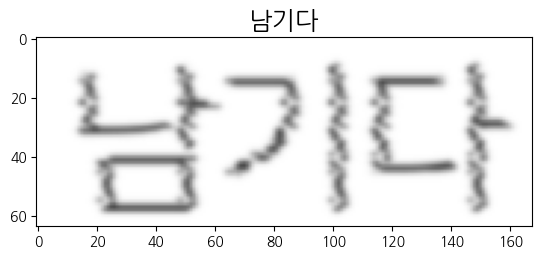

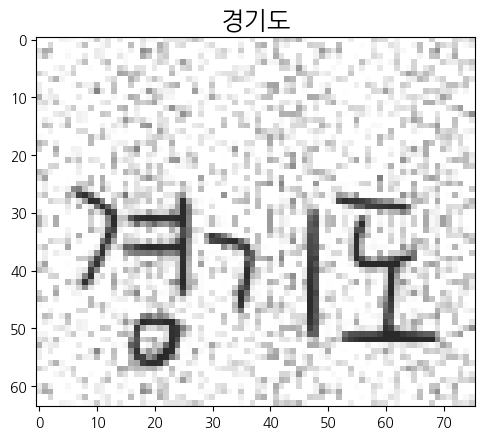

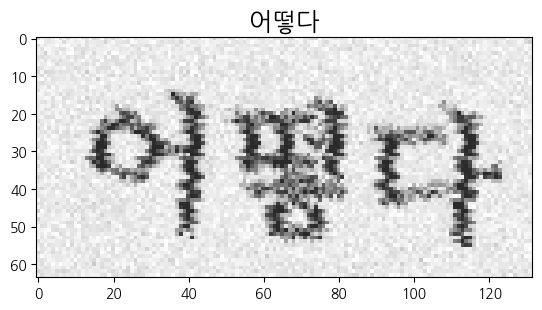

In [25]:
show_sample_image(df=df, n_sample=3, n_len=3)

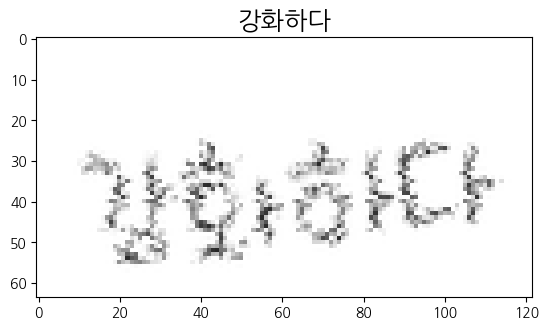

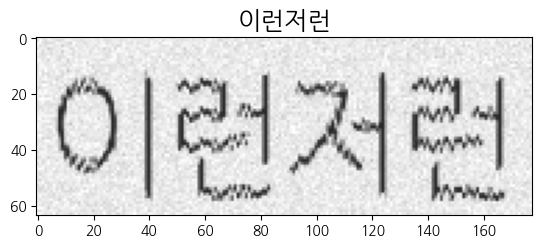

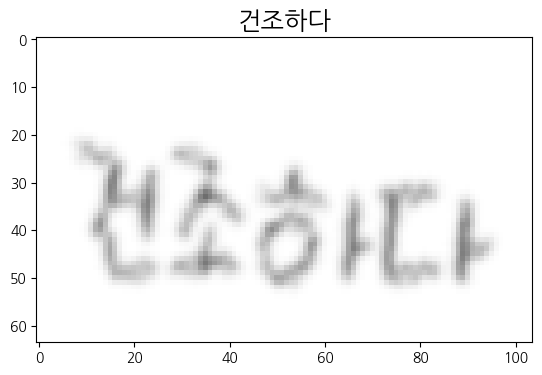

In [26]:
show_sample_image(df=df, n_sample=3, n_len=4)

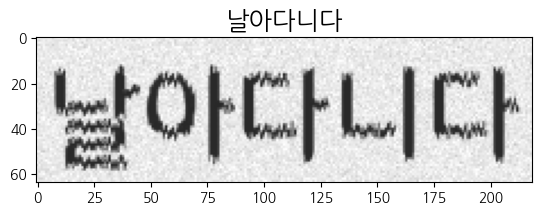

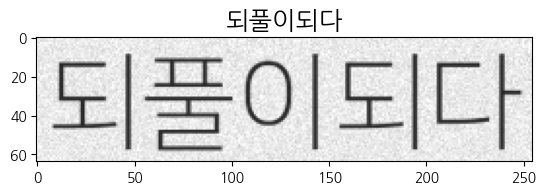

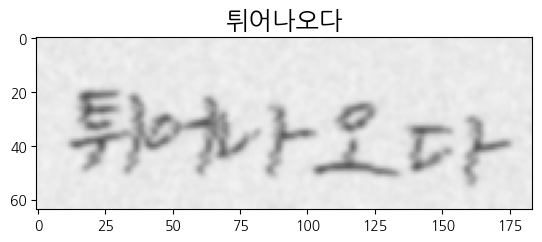

In [27]:
show_sample_image(df=df, n_sample=3, n_len=5)

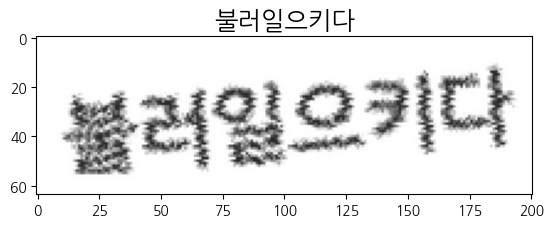

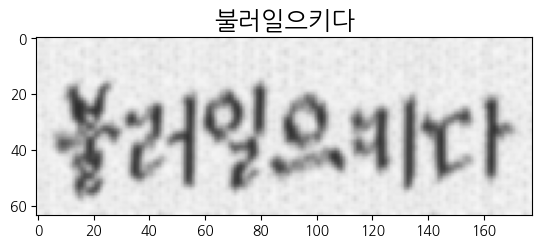

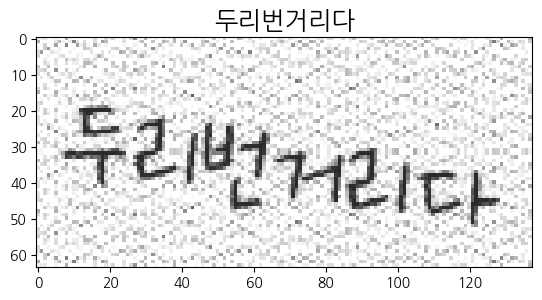

In [28]:
show_sample_image(df=df, n_sample=3, n_len=6)

In [29]:
plt.rcParams['font.family']='NanumGothic'

In [30]:
sns.set(font='NanumGothic', 
        rc={"axes.unicode_minus":False},
        style='darkgrid')


In [31]:
matplotlib.matplotlib_fname()

'c:\\Users\\user\\anaconda3\\envs\\OCR\\lib\\site-packages\\matplotlib\\mpl-data\\matplotlibrc'

In [32]:
matplotlib.get_cachedir()

'C:\\Users\\user\\.matplotlib'

<AxesSubplot:title={'center':'한글폰트'}>

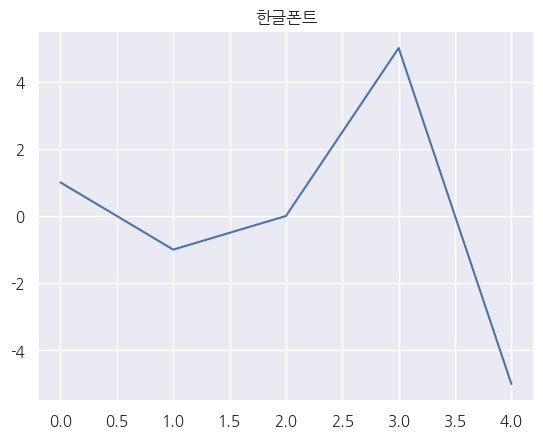

In [33]:
test_data = [1,-1,0,5,-5]
pd.Series(test_data).plot(title="한글폰트")

In [34]:
def show_count_label(df, n_len, n_show):
  df = sample_df_by_len(df=df, n_sample=1.0, n_len=n_len, use_frac=True)
  
  df = pd.DataFrame(df['label'].value_counts())
  df.reset_index(inplace=True)
  df.columns = ['label', 'count_label']
  df.sort_values(by='count_label', ascending=False, inplace=True)

  many_df = df.head(n_show)
  little_df = df.tail(n_show)

  fig, ax = plt.subplots(ncols=2, figsize=(13, 6))

  sns.barplot(data=many_df, x='count_label', y='label', ax=ax[0])
  # plt.ylabel('label', fontproperties=fontprop)
  # plt.xlabel('count_label', fontproperties=fontprop)
  # plt.plot(data=many_df, ax=ax[0])
  ax[0].set_title(f'label 길이 {n_len}의 label 개수 상위 {n_show}', fontproperties=fontprop)

  # plt.ylabel('label', fontproperties=fontprop)
  # plt.xlabel('count_label', fontproperties=fontprop)
  # plt.plot(data=little_df, ax=ax[1])
  sns.barplot(data=little_df, x='count_label', y='label', ax=ax[1])
  ax[1].set_title(f'label 길이 {n_len}의 label 개수 하위 {n_show}', fontproperties=fontprop)

  plt.show()

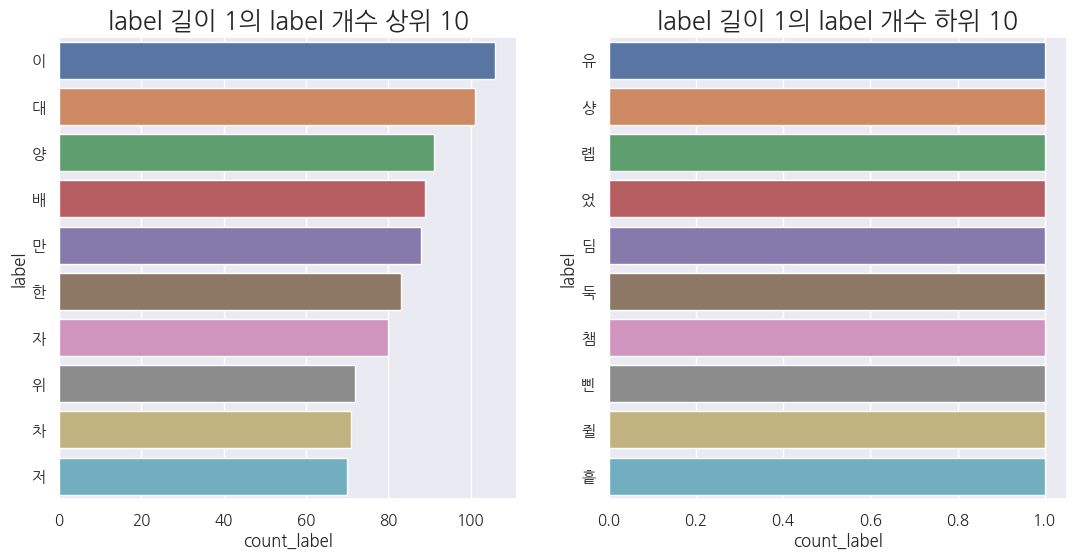

In [36]:
# label 개수가 1개인 데이터 존재
show_count_label(df, 1, 10)

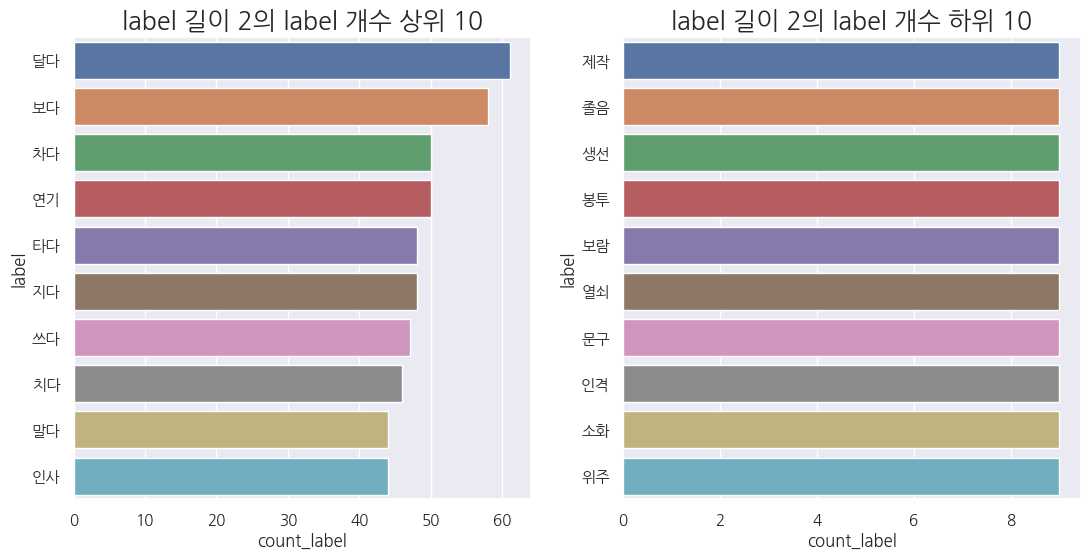

In [37]:
show_count_label(df, 2, 10)

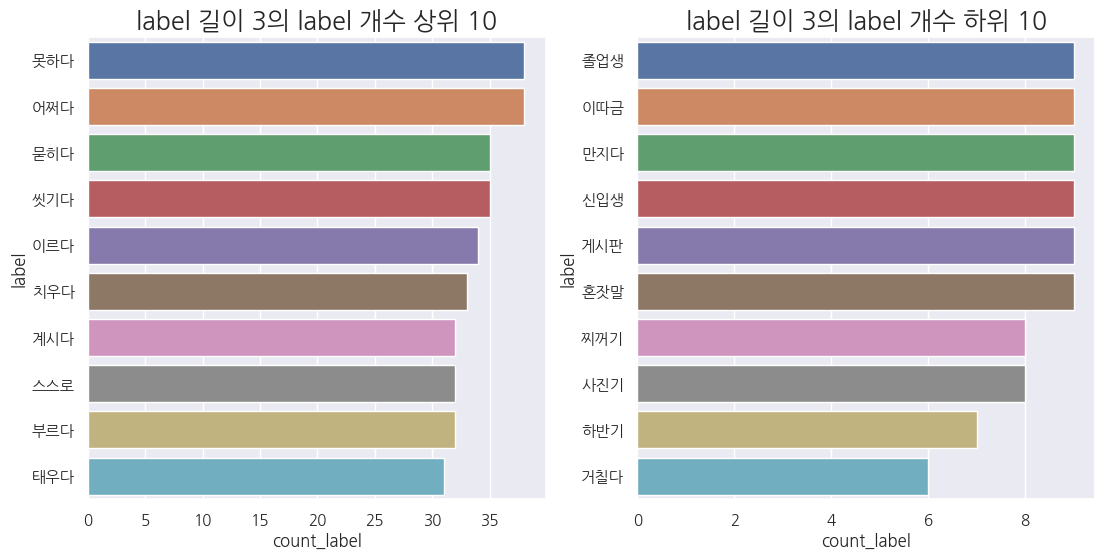

In [38]:
show_count_label(df, 3, 10)

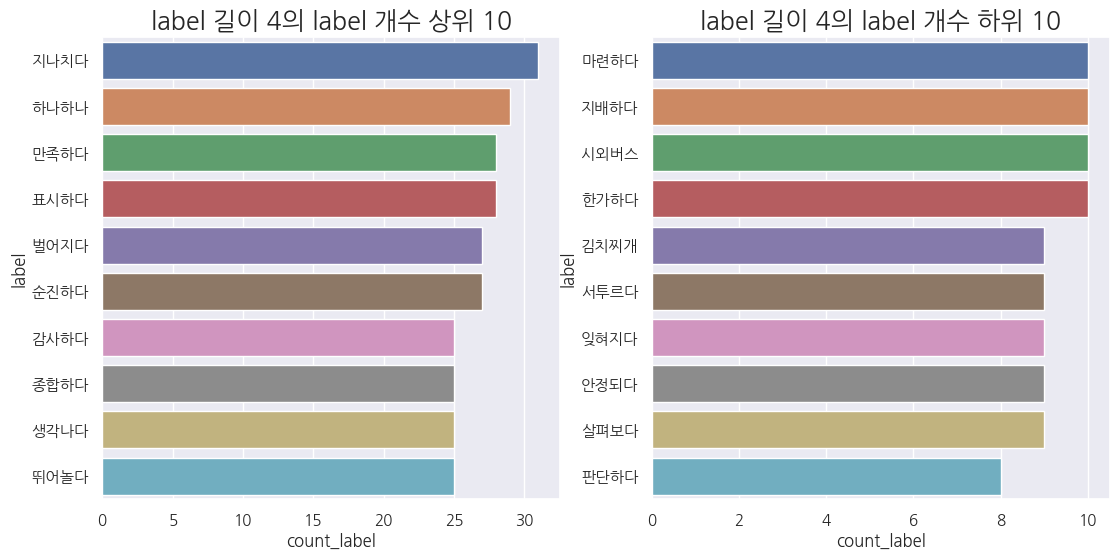

In [39]:
show_count_label(df, 4, 10)

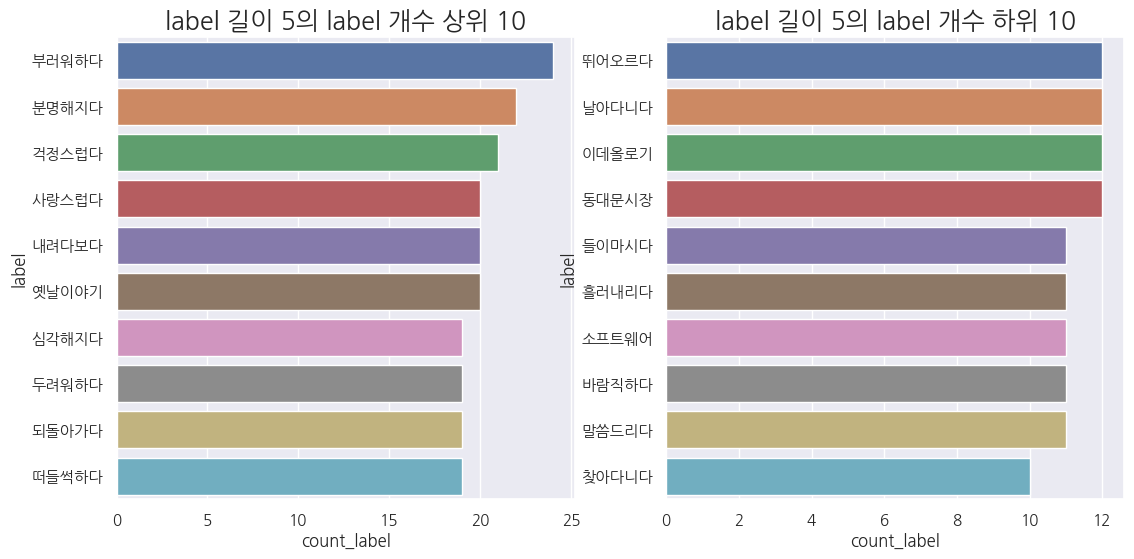

In [40]:
show_count_label(df, 5, 10)

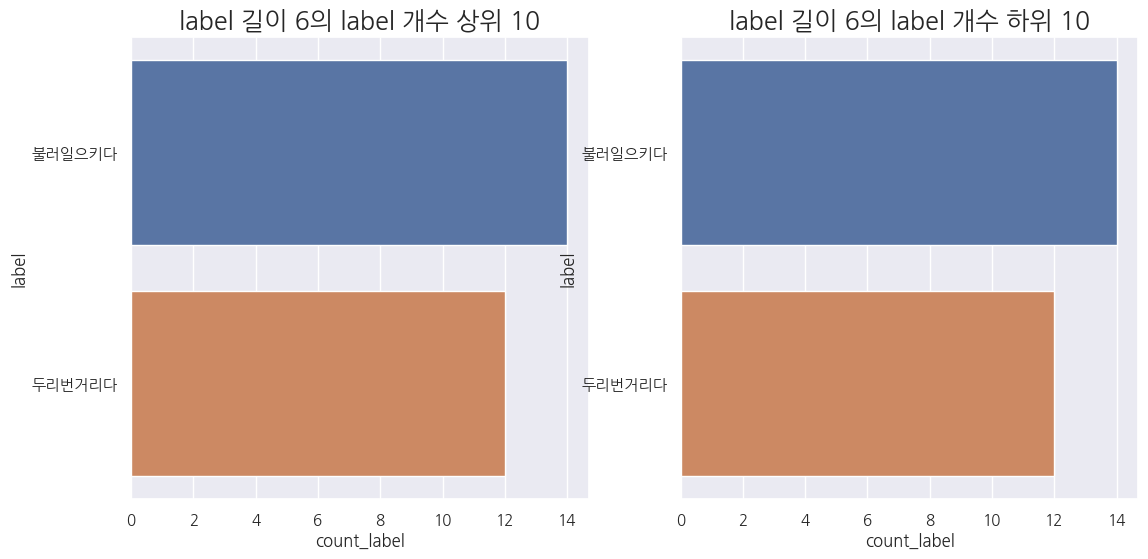

In [41]:
show_count_label(df, 6, 10)

In [43]:
X_size = []
Y_size = []

for path in tqdm(df['img_path']):

  image = Image.open(path)

  image_size = image.size

  X = image_size[0]
  Y = image_size[-1]

  X_size.append(X)
  Y_size.append(Y)

df['X'] = X_size
df['Y'] = Y_size

  0%|          | 0/76888 [00:00<?, ?it/s]

<AxesSubplot:xlabel='X', ylabel='Y'>

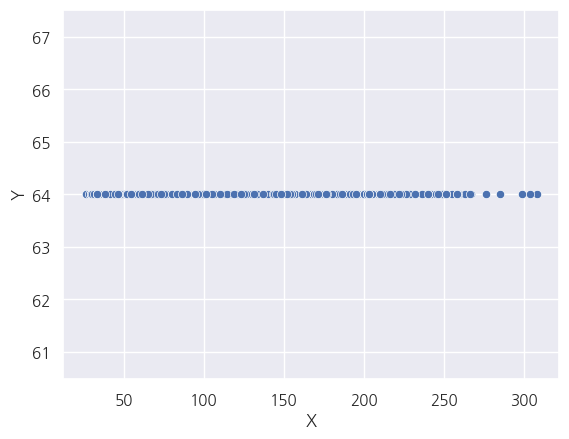

In [44]:
# 세로 길이는 64로 통일
sns.scatterplot(data=df, x='X', y='Y')

In [45]:
df['X'].max()

308

가장 긴 가로 길이 : 308
가장 짧은 가로 길이 : 26
평균 가로 길이 : 87.358


<AxesSubplot:xlabel='X', ylabel='Count'>

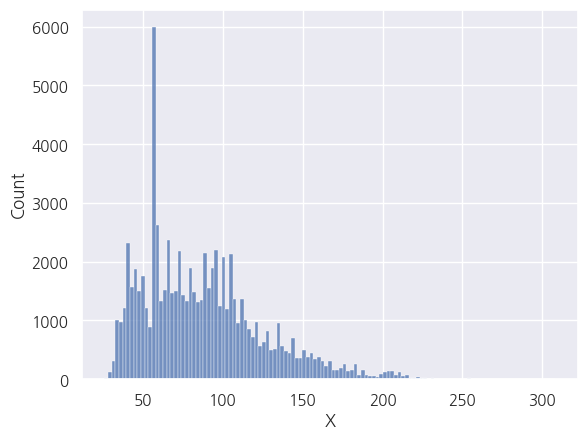

In [46]:
# 가로 길이가 50 후반인 데이터가 많다
print('가장 긴 가로 길이 : {}'.format(df['X'].max()))
print('가장 짧은 가로 길이 : {}'.format(df['X'].min()))
print('평균 가로 길이 : {:.3f}'.format(df['X'].mean()))
sns.histplot(data=df, x='X')

In [47]:
df_X_Size = pd.DataFrame(df['X'].value_counts())
df_X_Size.columns = ['X_Size_Count']
df_X_Size

,X_Size_Count
58,3922
59,1633
57,1503
100,1168
93,1092
...,...
299,1
308,1
242,1
230,1
